# Analysis

For this exercise, I took a random sample of 500 cities across the globe, specifically between -90 and 90 degrees latitude to look for data to answer the question "What's the weather like as we approach the equator?"

I got my list of cities by randomly picking a latitude between -90 and 90 degrees and a longitude between -180 and 180 degrees and using the "citipy" library to find the nearest city to those coordinates.  Once the city was found, I used the OpenWeatherMap API to find the weather. If the weather data doesn't exist, the city is discarded and the script looks for another set of coordinates until it collects 500. 

The first thing I noticed was that regardless of how many times I run the script, the data points fall between -60 and 80 degrees longitude even though the random function is set between -90 and 90. It makes sense once you look at a map and notice that the only thing south of 60 degrees latitude is the Antartic Circle and north of 80 degrees is the Artic Circle, so although coordinates may have come up for those areas, it is highly unlikely that weather data was available and therefore, not in the data set. For this exercise, gathering additional data for this part of the world wouldn't alter the trend the current data is displaying, so I didn't investigate further.

The assumption is that the weather gets warmer and more humid the closer one gets to the equator.  The first graph, City Latitude vs. Max Temperature supports that assumption, with the highest temperatures occurring within 20 degrees latitude north or south from the equator and the temperatures continue declining as you move away from the equator. The second graph, City Latitude vs. Humidity does not support my assumption of being more humid the closer one gets to the equator. Where the highest temperatres are seen, between -20 and 20 degrees latitude, the humidity ranges from 20% to 100% and at the edges, -40 and 80 degrees latitude, there are cities with humidity between 80% and 100%. One might think it is more humid closer to the equator because the temperature is higher making it miserable, but it does seem that humidity is not affected by the proximity to the equator. 

I don't know much about the weather, but I didn't expect cloudiness or wind speed to be a useful descriptor of the weather near the equator, and they turned out not to be. Significant weather patterns used to describe the equator usually only include heat and humidity. As with humidity, the chartd City Latitude vs. Cloudiness and City Latitude vs. Wind Speed, show that there is no significant trend of either at the equator. What was expected was that the Cloudiness and Humidity charts to corrolate more than they seem to. 

In [2]:
from citipy import citipy
from config import api_key
import openweathermapy.core as owm
import requests
import random
import pandas as pd
import matplotlib.pyplot as plt

# Generate Cities List and Make API Calls

In [3]:
cities = []
countries = []
date = []
latitude = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
counter = 1
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
records = 500

print("Beginning Data Retrieval")
print("------------------------------")
while counter <= records:
    lat = random.randint(-90,90)
    long = random.randint(-180,180)    
    city_data = citipy.nearest_city(lat, long)
    city = city_data.city_name
    country = city_data.country_code
    
    if not city in cities:
        try: 
            query_url = f"{url}appid={api_key}&units={units}&q={city}"
            weather_data = requests.get(query_url).json()
            cities.append(city) 
            countries.append(country)
            date.append(weather_data["dt"])
            latitude.append(weather_data["coord"]["lat"])
            max_temp.append(weather_data["main"]["temp_max"])
            humidity.append(weather_data["main"]["humidity"])
            clouds.append(weather_data["clouds"]["all"])
            wind_speed.append(weather_data["wind"]["speed"])
            print(f"Processing Record {counter} of {records} | {city}")
            print(f"{query_url}")
            counter += 1
        except:
            cities.remove(city)
            countries.remove(country)
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")


Beginning Data Retrieval
------------------------------
Processing Record 1 of 500 | saint george
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=saint george
Processing Record 2 of 500 | gornyy
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=gornyy
Processing Record 3 of 500 | carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=carnarvon
Processing Record 4 of 500 | tokmak
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=tokmak
Processing Record 5 of 500 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=puerto ayora
Processing Record 6 of 500 | alta floresta
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=alta floresta
Processing Record 7 of 5

Processing Record 55 of 500 | douglas
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=douglas
Processing Record 56 of 500 | huron
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=huron
Processing Record 57 of 500 | owosso
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=owosso
Processing Record 58 of 500 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=bredasdorp
Processing Record 59 of 500 | dzaoudzi
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=dzaoudzi
Processing Record 60 of 500 | tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=tuatapere
Processing Record 61 of 500 | juegang
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc

Processing Record 110 of 500 | bulungu
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=bulungu
Processing Record 111 of 500 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=cabo san lucas
Processing Record 112 of 500 | kapuskasing
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=kapuskasing
Processing Record 113 of 500 | viedma
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=viedma
Processing Record 114 of 500 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=mar del plata
Processing Record 115 of 500 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=qaanaaq
Processing Record 116 of 500 | catuday
http://api.openweathermap.org

Processing Record 164 of 500 | hamilton
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=hamilton
Processing Record 165 of 500 | necochea
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=necochea
Processing Record 166 of 500 | uniontown
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=uniontown
Processing Record 167 of 500 | haimen
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=haimen
Processing Record 168 of 500 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=ponta do sol
Processing Record 169 of 500 | severnoye
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=severnoye
Processing Record 170 of 500 | morondava
http://api.openweathermap.org/data/2.5/

Processing Record 218 of 500 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=los llanos de aridane
Processing Record 219 of 500 | isangel
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=isangel
Processing Record 220 of 500 | mackay
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=mackay
Processing Record 221 of 500 | kieta
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=kieta
Processing Record 222 of 500 | ustka
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=ustka
Processing Record 223 of 500 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=saint-philippe
Processing Record 224 of 500 | zavallya
http://api.openweathermap.or

Processing Record 272 of 500 | kaspiysk
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=kaspiysk
Processing Record 273 of 500 | baykit
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=baykit
Processing Record 274 of 500 | peniche
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=peniche
Processing Record 275 of 500 | yashkul
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=yashkul
Processing Record 276 of 500 | fort nelson
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=fort nelson
Processing Record 277 of 500 | mao
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=mao
Processing Record 278 of 500 | messina
http://api.openweathermap.org/data/2.5/weather?appid=68849a8d

Processing Record 326 of 500 | gizo
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=gizo
Processing Record 327 of 500 | emerald
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=emerald
Processing Record 328 of 500 | tiznit
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=tiznit
Processing Record 329 of 500 | makkaveyevo
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=makkaveyevo
Processing Record 330 of 500 | preobrazheniye
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=preobrazheniye
Processing Record 331 of 500 | miquelon
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=miquelon
Processing Record 332 of 500 | aanekoski
http://api.openweathermap.org/data/2.5/weat

Processing Record 380 of 500 | marathon
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=marathon
Processing Record 381 of 500 | beisfjord
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=beisfjord
Processing Record 382 of 500 | vallenar
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=vallenar
Processing Record 383 of 500 | kizema
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=kizema
Processing Record 384 of 500 | kenai
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=kenai
Processing Record 385 of 500 | kichera
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=kichera
Processing Record 386 of 500 | mitu
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc

Processing Record 435 of 500 | tuy hoa
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=tuy hoa
Processing Record 436 of 500 | beidao
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=beidao
Processing Record 437 of 500 | eyl
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=eyl
Processing Record 438 of 500 | port hardy
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=port hardy
Processing Record 439 of 500 | mahibadhoo
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=mahibadhoo
Processing Record 440 of 500 | nagai
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=nagai
Processing Record 441 of 500 | san vicente
http://api.openweathermap.org/data/2.5/weather?appid=68849a

Processing Record 489 of 500 | lufilufi
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=lufilufi
Processing Record 490 of 500 | ardakan
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=ardakan
Processing Record 491 of 500 | bayan
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=bayan
Processing Record 492 of 500 | chandil
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=chandil
Processing Record 493 of 500 | la palma
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=la palma
Processing Record 494 of 500 | koumac
http://api.openweathermap.org/data/2.5/weather?appid=68849a8dc03a9447c9dbfd458a9196f7&units=imperial&q=koumac
Processing Record 495 of 500 | ust-tsilma
http://api.openweathermap.org/data/2.5/weather?appid=68849a8

# Consolidate Weather Data

In [4]:
data = {"City" : cities, "Country": countries, "Date": date,"Latitude": latitude, "Max Temp": max_temp,\
        "Humidity": humidity, "Cloudiness": clouds, "Wind Speed": wind_speed}
city_weather = pd.DataFrame(data)
city_weather.to_csv("city_weather.csv")
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Max Temp,Wind Speed
0,saint george,40,bm,1527650400,63,39.45,62.60,5.82
1,gornyy,0,kg,1527651913,45,51.76,57.18,11.99
2,carnarvon,8,ec,1527651914,70,-30.97,25.05,2.93
3,tokmak,0,pf,1527651914,30,47.26,56.28,9.98
4,puerto ayora,0,sh,1527651914,99,-0.74,74.10,10.54


# Latitude vs. Temperature Plot

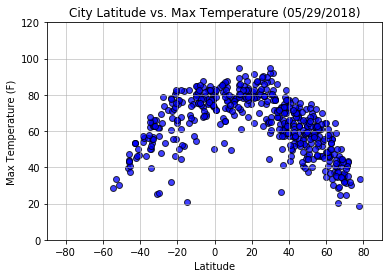

In [5]:
plt.scatter(city_weather["Latitude"], city_weather["Max Temp"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (05/29/2018)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-90, 90)
plt.ylim(0,120)
plt.grid(alpha=.7)
plt.savefig("max_temp.png")
plt.show()


# Latitude vs. Humidity Plot 

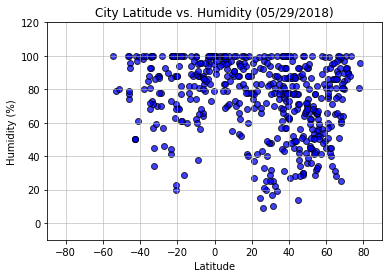

In [6]:
plt.scatter(city_weather["Latitude"], city_weather["Humidity"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity (05/29/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90, 90)
plt.ylim(-10,120)
plt.grid(alpha=.7)
plt.savefig("humidity.png")
plt.show()

# Latitude vs. Cloudiness Plot

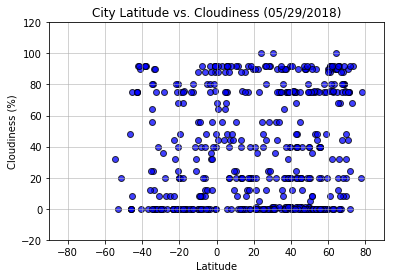

In [7]:
plt.scatter(city_weather["Latitude"], city_weather["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (05/29/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-90, 90)
plt.ylim(-20,120)
plt.grid(alpha=.7)
plt.savefig("cloudiness.png")
plt.show()

# Latitude vs. Wind Speed Plot

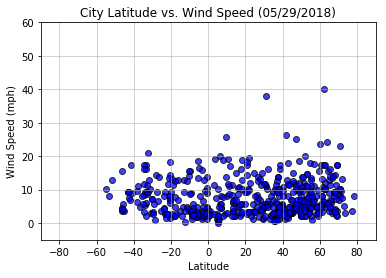

In [8]:
plt.scatter(city_weather["Latitude"], city_weather["Wind Speed"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (05/29/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-90, 90)
plt.ylim(-5,60)
plt.grid(alpha=.7)
plt.savefig("wind_speed.png")
plt.show()